# Bank data analysis (Term bank deposit)

The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  
Make feature engineering but also try differnet models in order to get as much accuracy as possible.


1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

# 1. Data Loading 

In [1]:
import pandas as pd
import sklearn
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv', sep=';', header=0)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


This data set is consisted of data about bank clients, their main features, and their responce to a campaign about subscription to term deposit. The class is their responce.

# 2. Data preprocessing

### Missing data (Unknown)

In [3]:
df['default'] = df['default'].replace(['unknown'],None)
df['loan'] = df['loan'].replace(['unknown'],None)


df['default'] = df['default'].fillna(df['default'].value_counts().index[0])
df['loan'] = df['loan'].fillna(df['loan'].value_counts().index[0])

In [4]:
df.drop(['duration'], axis=1, inplace=True)


This data set does not have missing values. but still some of the features have unknown values. For some features it is decided
for unknown to remain as it is and some of them like loan and default will be repalsed with most frequent values due to the fact
that this information is usually publicly available 

### Log transformation to eliminate 'skew' effect

In [5]:
df = df.assign(campaign = np.log(df['campaign']+0.1))

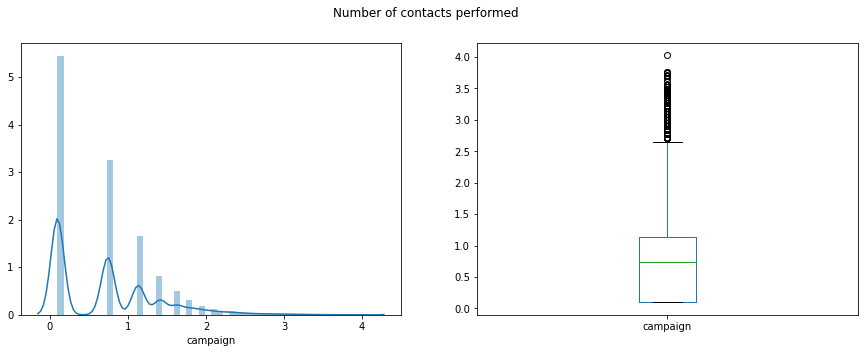

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Number of contacts performed')

plt.subplot(121)
sns.distplot(df['campaign'])

plt.subplot(122)
df['campaign'].plot(kind='box')

### Scaling

In [7]:
from sklearn.preprocessing import RobustScaler

columns = ['age','cons.price.idx','cons.conf.idx','euribor3m','campaign']
transformer = RobustScaler()

df[columns] = transformer.fit_transform(df[columns])

In [8]:
from sklearn.preprocessing import Normalizer
import numpy as np 

columns = ['previous','pdays']
normalizer = Normalizer(norm='l2') 
df[columns] = normalizer.fit_transform(df[columns])

### Category encoding

In [9]:
X = df.drop("y", axis=1)
y = df['y']

y = pd.DataFrame(y)

In [10]:
from sklearn.preprocessing import LabelEncoder

column = 'y'
transformer = LabelEncoder()
fitted_model = transformer.fit(['yes', 'no'])
y = y.assign(y_label_sklearn=fitted_model.transform(df['y']))

In [11]:
y.drop(['y'], axis=1, inplace=True)

In [12]:
import category_encoders as ce

cat_features = ['job','marital','default', 'housing', 'loan', 'poutcome', 'contact','education', 'month', 'day_of_week']
count_encoder = ce.CatBoostEncoder(cols=cat_features)
X[cat_features] = count_encoder.fit_transform(X[cat_features], y)

In [13]:
y = y.values.ravel()

### SMOTE

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
!pip install imblearn
!pip install delayed

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

oversample1 = SMOTE()
X_test, y_test = oversample1.fit_resample(X_test, y_test)

y = pd.DataFrame(y)
y = y.values.ravel()

# 3. Classification models


### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print('Accuracy on the training subset ', (tree.score(X_train, y_train)))
print('Accuracy on the test subset:', (tree.score(X_test, y_test)))

Accuracy on the training subset  1.0
Accuracy on the test subset: 0.8391831525207403


### RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)


print('Accuracy on the training subset ', (forest.score(X_train, y_train)))
print('Accuracy on the test subset:', (forest.score(X_test, y_test)))

Accuracy on the training subset  1.0
Accuracy on the test subset: 0.8884583827149238


### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train )



print('Accuracy on the training subset ',(knn_model.score(X_train, y_train)))
print('Accuracy on the test subset:', (knn_model.score(X_test, y_test)))

Accuracy on the training subset  0.9116658196176551
Accuracy on the test subset: 0.7233567326100829


### Gaussian

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy on the training subset ',(gnb.score(X_train, y_train)))
print('Accuracy on the test subset:', (gnb.score(X_test, y_test)))

Accuracy on the training subset  0.7232690879236874
Accuracy on the test subset: 0.7162913665785395


### Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

print('Accuracy on the training subset ',(GBC.score(X_train, y_train)))
print('Accuracy on the test subset:', (GBC.score(X_test, y_test)))

Accuracy on the training subset  0.8381484811759646
Accuracy on the test subset: 0.8457471054790774


### Extreme Gradient Boosting

In [ ]:
pip install xgboost

In [23]:
import xgboost as xgb 
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

use_label_encoder=False 


Xgb = XGBClassifier(min_child_weight= 1, 
                    max_depth= 15, 
                    learning_rate = 0.3, 
                    gamma = 0.1, 
                    colsample_bytree = 0.4)
Xgb.fit(X_train, y_train)

print('Accuracy on the training subset ',(Xgb.score(X_train, y_train)))
print('Accuracy on the test subset:', (Xgb.score(X_test, y_test)))

# 4. Evaluation and comparisons, various metrics

### Accuracy, Precison, Recall

In [24]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_curve

y_pred_tree = tree.predict(X_test)
y_pred_forest = forest.predict(X_test)
#y_pred_svm = svm.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_gnb = gnb.predict(X_test)
y_gbc = GBC.predict(X_test)
y_Xgb = Xgb.predict(X_test)

classes  = ['no', 'yes']

Accuracy_DecisionTree = accuracy_score(y_test, y_pred_tree)
Accuracy_RandomForest = accuracy_score(y_test, y_pred_forest)
#Recall_SVM = accuracy_score(y_test, y_pred_svm)
Accuracy_KNN = accuracy_score(y_test, y_pred_knn)
Accuracy_gnb = accuracy_score(y_test, y_gnb)
Accuracy_gbc = accuracy_score(y_test, y_gbc)
Accuracy_Xgb = accuracy_score(y_test, y_Xgb)

Recall_DecisionTree = recall_score(y_test, y_pred_tree)
Recall_RandomForest = recall_score(y_test, y_pred_forest)
#Recall_SVM = recall_score(y_test, y_pred_svm)
Recall_KNN = recall_score(y_test, y_pred_knn)
Recall_gnb = recall_score(y_test, y_gnb)
Recall_gbc = recall_score(y_test, y_gbc)
Recall_Xgb = recall_score(y_test, y_Xgb)


Precision_DecisionTree = precision_score(y_test, y_pred_tree)
Precision_RandomForest = precision_score(y_test, y_pred_forest)
#Precision_SVM = precision_score(y_test, y_pred_svm)
Precision_KNN = precision_score(y_test, y_pred_knn)
Precision_gnb = precision_score(y_test, y_gnb)
Precision_gbc = precision_score(y_test, y_gbc)
Precision_Xgb = precision_score(y_test, y_Xgb)



data = {'Metric':  ['Accuracy','Recall','Precision'],
        'DecisionTree': [Accuracy_DecisionTree, Recall_DecisionTree, Precision_DecisionTree],
        'RandomForest': [Accuracy_RandomForest,Recall_RandomForest, Precision_RandomForest],
        #'SVM': [Recall_SVM,Precision_SVM],
        'KNN': [Accuracy_KNN,Recall_KNN,Precision_KNN],
        'Gaussian':[Accuracy_gnb,Recall_gnb,Precision_gnb],
        'GradientBoosting':[Accuracy_gbc,Recall_gbc,Precision_gbc],
        'EXtremeGradientBoosting':[Accuracy_Xgb,Recall_Xgb,Precision_Xgb]
        }
comparison = pd.DataFrame (data, columns = ['Metric','DecisionTree', 'RandomForest','KNN','Gaussian','GradientBoosting',
                                            'EXtremeGradientBoosting'])
comparison


,Metric,DecisionTree,RandomForest,KNN,Gaussian,GradientBoosting,EXtremeGradientBoosting
0,Accuracy,0.839183,0.888458,0.723357,0.716291,0.845747,0.920777
1,Recall,0.788039,0.821679,0.621205,0.528672,0.792688,0.883854
2,Precision,0.877831,0.948338,0.780706,0.846199,0.886792,0.954326


### Confusion Matrix

[22:03:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


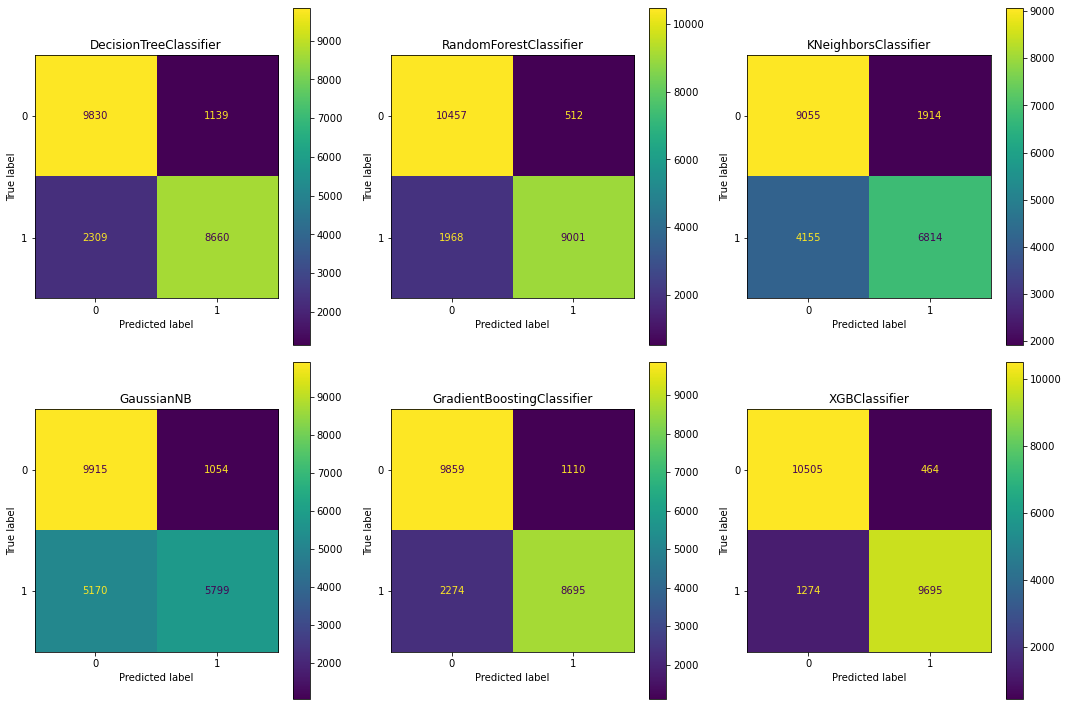

In [25]:
classifiers = [tree, forest, knn_model, gnb, GBC, Xgb]
for cls in classifiers:
    cls.fit(X_train, y_train)
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          values_format='2g')                          
                         #display_labels=y_names)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()


### ROC Curve

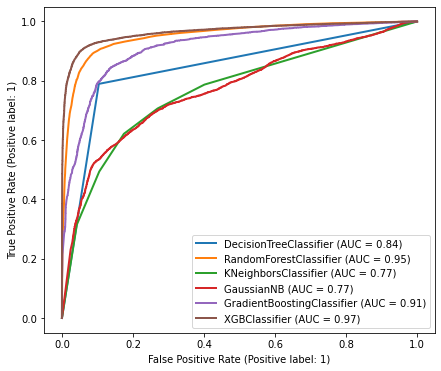

In [27]:
from sklearn import metrics 
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(7,6))
classifiers = [tree, forest, knn_model, gnb, GBC, Xgb]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax,linewidth= 2)

# 5. Hiperparametar optimization - Randomized Search 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
np.random.seed(seed=1)

kf = KFold(n_splits=10, shuffle=True)


from sklearn.model_selection import RandomizedSearchCV

random_search = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                 "max_depth"        : [ 3, 4, 8, 10, 12, 15],
                 "min_child_weight" : [ 1, 3, 5, 7 ],
                 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

Xgb = XGBClassifier()
model = RandomizedSearchCV(estimator = Xgb, 
                           param_distributions = random_search, 
                           n_iter = 100, 
                           cv = 3, verbose= 5, random_state= 1, 
                           n_jobs = -1, scoring = 'roc_auc',)

model.fit(X_train,y_train)



In [ ]:
print("Best Parameters: ", model.best_params_)
print("Best score ", model.best_score_)

# 6. Final evaluations and comparisons


### 10 fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
np.random.seed(seed=1)

#10-fold Cross validaiton - ALL Model - All scores
scoring = ['precision_macro', 'recall_macro']
kf = KFold(n_splits=10, shuffle=True)

scores1 = cross_validate(forest, X, y, cv=kf, scoring=scoring)
y_pred_forest = cross_val_predict(forest, X, y, cv=kf)

scores2 = cross_validate(Xgb, X, y, cv=kf, scoring=scoring)
y_pred_Xgb = cross_val_predict(Xgb, X, y, cv=kf)

In [29]:
Precision_RandomForest = np.mean(scores1['test_precision_macro'])
Recall_RandomForest = np.mean(scores1['test_recall_macro'])

Precision_Xgb = np.mean(scores2['test_precision_macro'])
Recall_Xgb = np.mean(scores2['test_recall_macro'])
                                                      


data = {'Metric':  ['Precision', 'Recall'],
        'RandomForest': [Precision_RandomForest, Recall_RandomForest],
        'EXtremeGradientBoosting':[Precision_Xgb, Recall_Xgb]
        }
comparison = pd.DataFrame (data, columns = ['Metric', 'RandomForest',
                                            'EXtremeGradientBoosting'])
comparison
        
        

,Metric,RandomForest,EXtremeGradientBoosting
0,Precision,0.752991,0.750156
1,Recall,0.632056,0.635047


# 7. Feature Importance 

<Figure size 720x720 with 0 Axes>

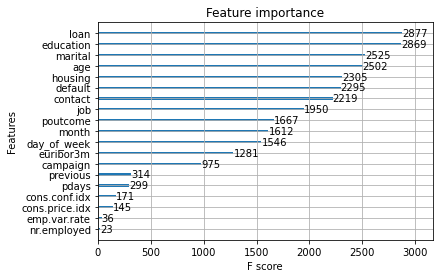

In [39]:
from xgboost import plot_importance
plt.figure(figsize=(10,10))
plot_importance(Xgb)
plt.show()


# 8. Model Deploy 

In [31]:
import pickle

filename = 'Model_Term_Deposit_Subscription'
pickle.dump(Xgb,open(filename,'wb'))